YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200
2020-01-07  72.241531  72.849208  72.021215  72.592578  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200
Model R^2 score: 0.9869307976846587


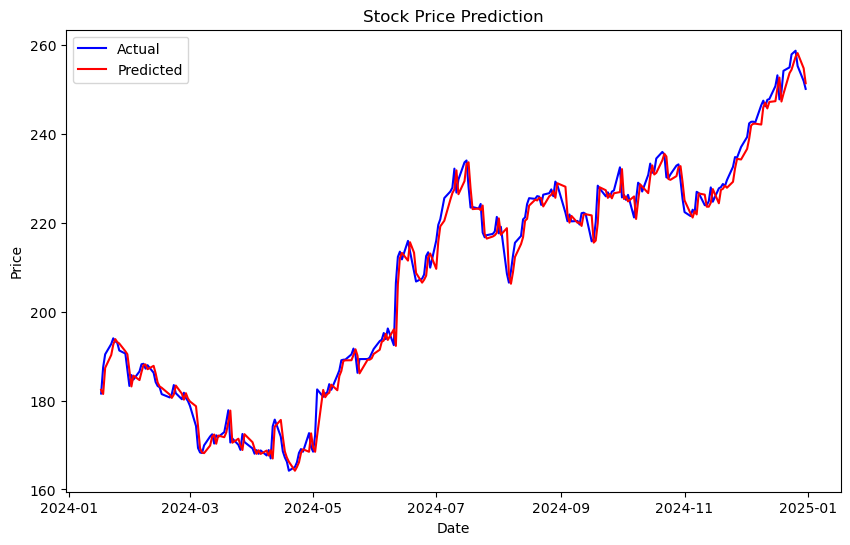

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

ticker = "AAPL"  
start_date = "2020-01-01"
end_date = "2025-01-01"

data = yf.download(ticker, start=start_date, end=end_date)

print(data.head())

data['Returns'] = data['Close'].pct_change()

data['50_MA'] = data['Close'].rolling(window=50).mean()

data = data.dropna()

data['Previous Close'] = data['Close'].shift(1)
data = data.dropna()

X = data[['Previous Close']]  
y = data['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"Model R^2 score: {model.score(X_test, y_test)}")

plt.figure(figsize=(10,6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

data['Predicted Close'] = model.predict(X)

data.to_csv("stock_analysis.csv", index=True)